In [1]:
from qiskit import IBMQ

IBMQ.load_account()

%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [2]:
provider = IBMQ.load_account()

from qiskit import QuantumCircuit, IBMQ, execute, Aer, QuantumRegister, ClassicalRegister, AncillaRegister
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor,backend_overview 
from qiskit.visualization import plot_histogram
from qiskit.quantum_info.states.statevector import Statevector
from qiskit.circuit.library.standard_gates import RYGate, CXGate, XGate
from qiskit.circuit import Parameter
import math 

ibmqfactory.load_account:WARNING:2022-05-15 10:19:57,159: Credentials are already in use. The existing account in the session will be replaced.


1


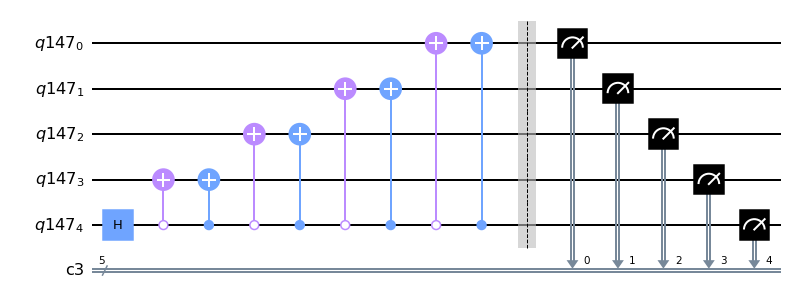

In [8]:
data = ['1111', '1111']             ### each data value must have the same length, but the length can be changed 
                                    ### the length of the data vector must be a power of two 
nancilla = int(math.log2(len(data)))
print(nancilla)
nqubits = len(data[0]) + nancilla
nclassical = nqubits

q = QuantumRegister(nqubits)
c = ClassicalRegister(nclassical)
# anc = AncillaRegister(nancilla)
circ = QuantumCircuit(q, c)

def getCtrlState(j, ancillalength):
    ctrl_bin = str(bin(j))
    ctrl_str = ctrl_bin.split('b')[1].zfill(ancillalength)
    ctrl_str = ''.join(reversed(ctrl_str)) ### Reverse because of Qiskit's most significant bit convention 
    return ctrl_str

maxqubit = nqubits - 1
max_encodable_qubit = maxqubit - nancilla
for h in range(nancilla):
    circ.h(maxqubit - h)

for i in range(len(data[0])):
    for j in range(len(data)):
        if (data[j][i] == '1'):
            ctrl = getCtrlState(j, nancilla)
            cx0 = XGate().control(nancilla, ctrl_state = ctrl)
            ancillaqubits = []
            for k in range(nancilla):
                ancillaqubits.append(maxqubit - k)
            ancillaqubits.append(max_encodable_qubit - i)
            circ.append(cx0, ancillaqubits)

circ.barrier()
circ.measure(q, c)
circ.draw(output='mpl')






least busy backend:  ibmq_belem
ibmq_belem
Job Status: job has successfully run


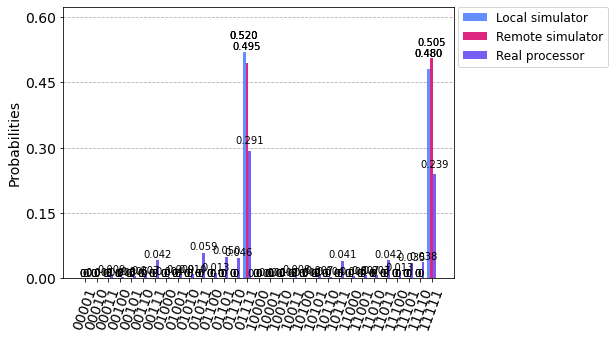

In [9]:
provider = IBMQ.get_provider()
provider.backends() 
local_sim_backend = Aer.get_backend('qasm_simulator') 
sim_backend = provider.get_backend('ibmq_qasm_simulator') 

real_backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= nqubits 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))

print("least busy backend: ", real_backend)
print(real_backend) 

job1 = execute(circ,local_sim_backend) 
job2 = execute(circ,sim_backend)
job3 = execute(circ,real_backend)
job_monitor(job3) 

counts1 = job1.result().get_counts()
counts2 = job2.result().get_counts()
counts3 = job3.result().get_counts()  

legend = ['Local simulator', 'Remote simulator', 'Real processor']
 
circ.draw()

plot_histogram([counts1, counts2, counts3], legend=legend)